In [1]:
import pandas
import numpy
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=10,8
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score
from sklearn import metrics
from sklearn import datasets,linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
import pandas
monthly_data=pandas.read_csv('C:/Users/ramir/Downloads/monthly.csv')

In [4]:
monthly_data

,Month,Date,Year,Price
0,1,31,2000,219.942449
1,2,29,2000,275.117647
2,3,31,2000,263.198203
3,4,30,2000,253.428767
4,5,31,2000,215.742602
5,6,30,2000,261.096335
6,7,31,2000,213.314059
7,8,31,2000,263.703758
8,9,30,2000,233.686687
9,10,31,2000,221.362520


In [5]:
#dependent variables and independent variables
monthly_data_x=monthly_data[['Date','Month','Year']]
monthly_data_y=monthly_data[['Price']]

In [6]:
x_train,y_train,x_test,y_test = train_test_split(monthly_data_x, monthly_data_y, test_size=0.2)

In [7]:
x_train

,Date,Month,Year
57,31,10,2004
11,31,12,2000
55,31,8,2004
48,31,1,2004
4,31,5,2000
43,31,8,2003
66,31,7,2005
8,30,9,2000
22,30,11,2001
42,31,7,2003


In [8]:
#reduce the dimensions of the data
date_scaler=StandardScaler()
date_scaler.fit(pandas.DataFrame(x_train['Date']))
x_train[['Date']]=date_scaler.transform(x_train[['Date']])

In [9]:
#reduce the dimensions of the month
month_scaler=StandardScaler()
month_scaler.fit(pandas.DataFrame(x_train['Month']))
x_train[['Month']]=month_scaler.transform(x_train[['Month']])

In [10]:
#reduce the dimensions of the year
year_scaler=StandardScaler()
year_scaler.fit(pandas.DataFrame(x_train['Year']))
x_train[['Year']]=year_scaler.transform(x_train[['Year']])

In [11]:
x_train.head()

,Date,Month,Year
57,0.660338,0.988035,1.020053
11,0.660338,1.540173,-1.454119
55,0.660338,0.435898,1.020053
48,0.660338,-1.496583,1.020053
4,0.660338,-0.392308,-1.454119


In [12]:
x_test.head()

,Price
57,235.529999
11,177.455402
55,193.256843
48,167.877164
4,215.742602


In [13]:
#reduce the dimensions of the price
price_scaler=StandardScaler()
price_scaler.fit(pandas.DataFrame(x_test['Price']))
x_test[['Price']]=price_scaler.transform(x_test[['Price']])

In [14]:
x_test.head()

,Price
57,0.828591
11,0.033742
55,0.250012
48,-0.097352
4,0.557767


In [15]:
y_train


,Date,Month,Year
65,30,6,2005
69,31,10,2005
9,31,10,2000
47,31,12,2003
63,30,4,2005
15,30,4,2001
6,31,7,2000
44,30,9,2003
51,30,4,2004
52,31,5,2004


In [16]:
date_scaler1=StandardScaler()
date_scaler1.fit(pandas.DataFrame(y_train['Date']))
y_train[['Date']]=date_scaler1.transform(y_train[['Date']])

In [17]:
month_scaler1=StandardScaler()
month_scaler1.fit(pandas.DataFrame(y_train['Month']))
y_train[['Month']]=month_scaler1.transform(y_train[['Month']])

In [18]:
year_scaler1=StandardScaler()
year_scaler1.fit(pandas.DataFrame(y_train['Year']))
y_train[['Year']]=year_scaler1.transform(y_train[['Year']])

In [19]:
y_train.head()

,Date,Month,Year
65,-0.422577,-0.297592,1.010263
69,0.845154,1.190367,1.010263
9,0.845154,1.190367,-1.602486
47,0.845154,1.934347,-0.034837
63,-0.422577,-1.041571,1.010263


In [20]:
y_test.head()

,Price
65,290.197238
69,323.380634
9,221.362520
47,172.632858
63,239.105947


In [21]:
price_scaler1=StandardScaler()
price_scaler1.fit(pandas.DataFrame(y_test['Price']))
y_test[['Price']]=price_scaler1.transform(y_test[['Price']])

In [22]:
y_test.head()

,Price
65,1.119190
69,1.598287
9,0.125364
47,-0.578187
63,0.381541


In [23]:
#use simple regression and fit the data
simple_linear_regression=LinearRegression()

In [24]:
simple_linear_regression.fit(pandas.DataFrame(x_train),pandas.DataFrame(x_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred=simple_linear_regression.predict(pandas.DataFrame(y_train))

In [26]:
y_pred

array([[ 0.25788034],
       [ 0.45352609],
       [-0.33563652],
       [ 0.20518372],
       [ 0.19055767],
       [-0.44077243],
       [-0.43662053],
       [ 0.0431993 ],
       [ 0.03272514],
       [ 0.12738689],
       [-0.12095548],
       [ 0.00123417],
       [ 0.19470956],
       [ 0.35886435],
       [-0.53128228]])

In [27]:
#find the mean square error
print("Mean squared error:%.1f" % mean_squared_error(y_test,y_pred))

Mean squared error:0.9


In [28]:
#find the mean absolute error
print("Mean absolute error:%.1f" % mean_absolute_error(y_test,y_pred))

Mean absolute error:0.9


In [29]:
#find the r2_score
print('R2 Score:%.2f'% r2_score(y_test,y_pred))

R2 Score:0.14


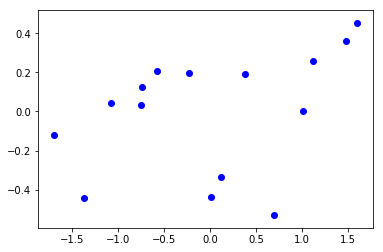

In [30]:
plt.scatter(y_test,y_pred,color='blue')


In [31]:
y_pred

array([[ 0.25788034],
       [ 0.45352609],
       [-0.33563652],
       [ 0.20518372],
       [ 0.19055767],
       [-0.44077243],
       [-0.43662053],
       [ 0.0431993 ],
       [ 0.03272514],
       [ 0.12738689],
       [-0.12095548],
       [ 0.00123417],
       [ 0.19470956],
       [ 0.35886435],
       [-0.53128228]])

In [32]:
y_test

,Price
65,1.119190
69,1.598287
9,0.125364
47,-0.578187
63,0.381541
15,-1.366778
6,0.009162
44,-1.070837
51,-0.744466
52,-0.737276
